# Testing Snowplow Algorithm

In [2]:
import os
# switch directories for import
os.chdir('c:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton')

import initialize
import params
from sectioning_streets import sectioning
from importlib import reload
%load_ext autoreload
%autoreload 2

Autoreload documentation: https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html

For reloading user modules

In [3]:
toyEdgeFile = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton\\graph_data\\edges.csv"
toyNodeFile = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton\\graph_data\\nodes.csv"

In [4]:
instance = "sectionedfullstreets"
polygon_path = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Data+Info\\GIS Data\\IndividualRoutes\\MiddletonRoute3-blue.gpkg"

match instance:
    case "smallstreets":
        G = initialize.create_small_streets()
    case "fullstreets":
        G = initialize.create_full_streets()
    case "smalltoy":
        G = initialize.create_small_toy(toyEdgeFile, toyNodeFile)
    case "sectionedfullstreets":
        G = sectioning.section_component(polygon_path)
    case _:
        print("Invalid instance name")
     

Average plow time:  27.43392939246323 max 209.24891813626604 min 0.5730624064553914


Update depot

In [5]:
if instance == "fullstreets" or instance == "sectionedfullstreets":
    params.DEPOT = params.find_depot(G)[0]
else:
    params.DEPOT = 0
params.DEPOT

113

Now reload all other modules for updated depot

In [6]:
os.chdir('c:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton')

import dual_graphs
import pandas as pd
import construction
import shortest_paths
import crossover
import osmnx as ox
import genetic 
import solution 
import costs 
import plotting
import local_search
import folium
import folium.plugins
%load_ext autoreload
%autoreload 2

dual_graphs = reload(dual_graphs)
construction = reload(construction)
shortest_paths = reload(shortest_paths)
crossover = reload(crossover)
genetic = reload(genetic)
solution = reload(solution)
costs = reload(costs)
plotting = reload(plotting)
local_search = reload(local_search)

from shortest_paths import ShortestPaths
from crossover import apply_crossover
from genetic import run_genetic
from solution import Solution
from routes_representations import RouteStep, full_routes
from costs import routes_cost
from params import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
approach = "genetic"

if approach == "genetic":
    G = initialize.add_multi_edges(G)
    if instance == "smallstreets" or instance == "fullstreets" or instance == "sectionedfullstreets":
        G_DUAL = dual_graphs.create_dual_streets(G)
    else:
        G_DUAL = dual_graphs.create_dual_toy(G)

elif approach == "annealing":
    if instance == "smallstreets" or instance == "fullstreets" or instance == "sectionedfullstreets":
        G_DUAL = dual_graphs.create_dual_streets(G, False, True)
    else:
        G_DUAL = dual_graphs.create_dual_toy(G, False, True)



In [8]:
print(G)
print(G_DUAL)

MultiDiGraph with 163 nodes and 722 edges
MultiDiGraph with 723 nodes and 3997 edges


In [9]:
sp = ShortestPaths(G_DUAL, False, True)

In [10]:
r, rreq = construction.route_generation(G, sp)

In [11]:
for route in r:
    for routestep in route:
        print(routestep)
    print("***")


113 --> 109. (0) Salt value: 20000. Prev: None. Next: None. Route end: False
109 --> 113. (0) Salt value: 19956.0706237275. Prev: (113, 109, 0). Next: None. Route end: False
***
113 --> 109. (1) Salt value: 20000. Prev: (109, 113, 0). Next: None. Route end: False
109 --> 113. (2) Salt value: 19956.0706237275. Prev: (113, 109, 1). Next: None. Route end: False
***
113 --> 110. (0) Salt value: 20000. Prev: (109, 113, 2). Next: None. Route end: False
110 --> 112. (0) Salt value: 19987.1938543755. Prev: (113, 110, 0). Next: None. Route end: False
112 --> 114. (1) Salt value: 19957.96285376525. Prev: (110, 112, 0). Next: None. Route end: False
114 --> 124. (1) Salt value: 19936.887968901. Prev: (112, 114, 1). Next: None. Route end: False
124 --> 125. (0) Salt value: 19915.413542483748. Prev: (114, 124, 1). Next: None. Route end: False
125 --> 111. (0) Salt value: 19908.58312176625. Prev: (124, 125, 0). Next: None. Route end: False
111 --> 113. (2) Salt value: 19888.9712549215. Prev: (125, 11

In [12]:
for route in rreq:
    for routestep in route:
        print(routestep)
    print("**")

(113, 109, 0)
(109, 113, 0)
**
(113, 109, 1)
(109, 113, 2)
**
(113, 110, 0)
(110, 112, 0)
(112, 114, 1)
(114, 124, 1)
(124, 125, 0)
(125, 111, 0)
(111, 113, 2)
**
(113, 110, 1)
(110, 111, 0)
(111, 113, 0)
**
(113, 109, 2)
(109, 113, 1)
**
(113, 110, 2)
(110, 112, 1)
(112, 114, 2)
(114, 124, 2)
(124, 125, 1)
(125, 111, 1)
(111, 110, 0)
(110, 111, 1)
(111, 113, 1)
**
(110, 112, 2)
(112, 114, 0)
(114, 124, 0)
(124, 125, 2)
(125, 111, 2)
(111, 110, 1)
**
(109, 108, 1)
(108, 107, 0)
(107, 108, 0)
(108, 88, 0)
(88, 108, 0)
(108, 88, 2)
(88, 87, 2)
(87, 49, 1)
(49, 48, 0)
(48, 49, 1)
(49, 87, 1)
(87, 62, 0)
(62, 58, 0)
(58, 62, 0)
(62, 87, 1)
(87, 147, 1)
(147, 63, 2)
(63, 59, 1)
(59, 57, 2)
(57, 60, 1)
(60, 57, 2)
(57, 60, 0)
(60, 93, 2)
(93, 60, 0)
(60, 93, 1)
(93, 60, 2)
(60, 57, 1)
(57, 60, 2)
(60, 64, 1)
(64, 141, 1)
(141, 146, 1)
(146, 49, 0)
(49, 88, 0)
(88, 108, 1)
(108, 109, 1)
(109, 108, 0)
(108, 88, 1)
(88, 87, 1)
(87, 62, 1)
(62, 58, 1)
(58, 56, 0)
(56, 58, 0)
(58, 62, 1)
(62, 87,

Test Local Search

In [25]:
required_edges = set(edge[:3] for edge in G.edges(data=True, keys=True) if edge[3]['priority'] != 0)
S_first = Solution(rreq, dict(), routes_cost(G, sp, rreq), 0)

print(routes_cost(G, sp, S_first.routes))

26888.690553379933


In [24]:
_, head = local_search.individual_to_linked_list(rreq)
print("Linked list costs:", costs.routes_cost_linked_list(G, sp, head))
print("Normal cost:", routes_cost(G, sp, rreq))

Linked list costs: 26888.690553379933
Normal cost: 26888.690553379933


In [26]:
S_new = local_search.local_improve(S_first, G, sp, required_edges, K, threshold=1)
print(routes_cost(G, sp, S_new.routes))
for route in S_new.routes:
    for routestep in route:
        print(routestep)
    print("***")

Starting length:  654
0 round done: time is  0.0
1 round done: time is  0.0
2 round done: time is  0.0
3 round done: time is  0.0
4 round done: time is  0.0005857944488525391
5 round done: time is  0.0
6 round done: time is  0.0
7 round done: time is  0.0
8 round done: time is  0.0
9 round done: time is  0.0005059242248535156
10 round done: time is  0.0
11 round done: time is  0.0
12 round done: time is  0.0
13 round done: time is  0.0
14 round done: time is  0.0005185604095458984
15 round done: time is  0.0
16 round done: time is  0.0
17 round done: time is  0.0
18 round done: time is  0.0005338191986083984
19 round done: time is  6.937980651855469e-05
20 round done: time is  0.0
Lengths not equal, first else
Old length: 644
New length: 654
edge1 (111, 113, 1) -> (110, 112, 2)
edge2prev (111, 113, 0) -> (111, 113, 1)
edge2end (109, 113, 1) -> (110, 112, 2) (109, 113, 1) -> (110, 112, 2)
edge1end (111, 113, 1) -> (110, 112, 2) (109, 113, 1) -> (110, 112, 2)
edge2end.next (110, 112, 2) 

Exception: Lengths not equal

In [1]:
s1, s1req = construction.route_generation(G, sp)
S1 = Solution(s1req, dict(), routes_cost(G, sp, s1req), 0)
S1 = local_search.local_improve(S1, G, sp, required_edges, K, threshold=1)

s2, s2req = construction.route_generation(G, sp)
S2 = Solution(s2req, dict(), routes_cost(G, sp, s2req), 0)
S2 = local_search.local_improve(S2, G, sp, required_edges, K, threshold=1)

NameError: name 'construction' is not defined

In [ ]:
S0 = apply_crossover(G, sp, S1.routes, S2.routes)
# idea for crossover: don't crossover a whole subsection of routes, but rather a fixed chunk (say 20-30 routesteps) of a route. This would significantly improve computation speed

In [ ]:
count0, count1, count2 = 0, 0, 0
for route in S0:
    for routestep in route:
        count0 += 1
for route in S1.routes:
    for routestep in route:
        count1 += 1
for route in S2.routes:
    for routestep in route:
        count2 += 1


print(count0, count1, count2)

654 654 654


In [ ]:
# 4. Route Improvement Algorithms
sol = run_genetic(G, sp)

for route in sol.routes:
    for edge in route:
        print(edge)
    print("***")

initial generation 0
initial generation 1
initial generation 2
initial generation 3
initial generation 4
initial generation 5
initial generation 6
initial generation 7
initial generation 8
initial generation 9
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
(113, 110, 0)
(112, 114, 1)
(114, 124, 1)
(124, 125, 1)
(125, 111, 1)
(113, 109, 1)
(109, 108, 1)
(108, 88, 0)
(108, 109, 2)
(87, 49, 0)
(87, 62, 1)
(58, 62, 1)
(64, 59, 1)
(59, 56, 0)
(56, 58, 0)
(56, 55, 1)
(56, 58, 1)
(56, 55, 0)
(56, 59, 0)
(58, 56, 0)
(49, 87, 1)
(146, 49, 1)
(49, 88, 1)
(108, 109, 0)
(109, 113, 2)
***
(113, 110, 1)
(110, 112, 0)
(110, 112, 1)
(110, 112, 2)
(112, 114, 0)
(114, 124, 2)
(124, 125, 0)
(125, 111, 0)
(111, 110, 1)
(112, 114, 2)
(114, 124

In [ ]:
full_route = full_routes(sp, sol.routes)
time_seconds = costs.route_travel_time(G, full_route)

In [ ]:
first_full_route = full_routes(sp, rreq)
time_seconds_first = costs.route_travel_time(G, first_full_route)
print("First route cost", routes_cost(G, sp, rreq))
print("First route travel time hours", time_seconds_first/3600)

First route cost 27637.06006359917
First route travel time hours 9.066989988693312


In [ ]:
# Display costs and travel time
print("Routes cost", sol.cost)
print("Travel time hours", time_seconds/3600)

Routes cost 46944.46583632689
Travel time hours 16.02837468954038


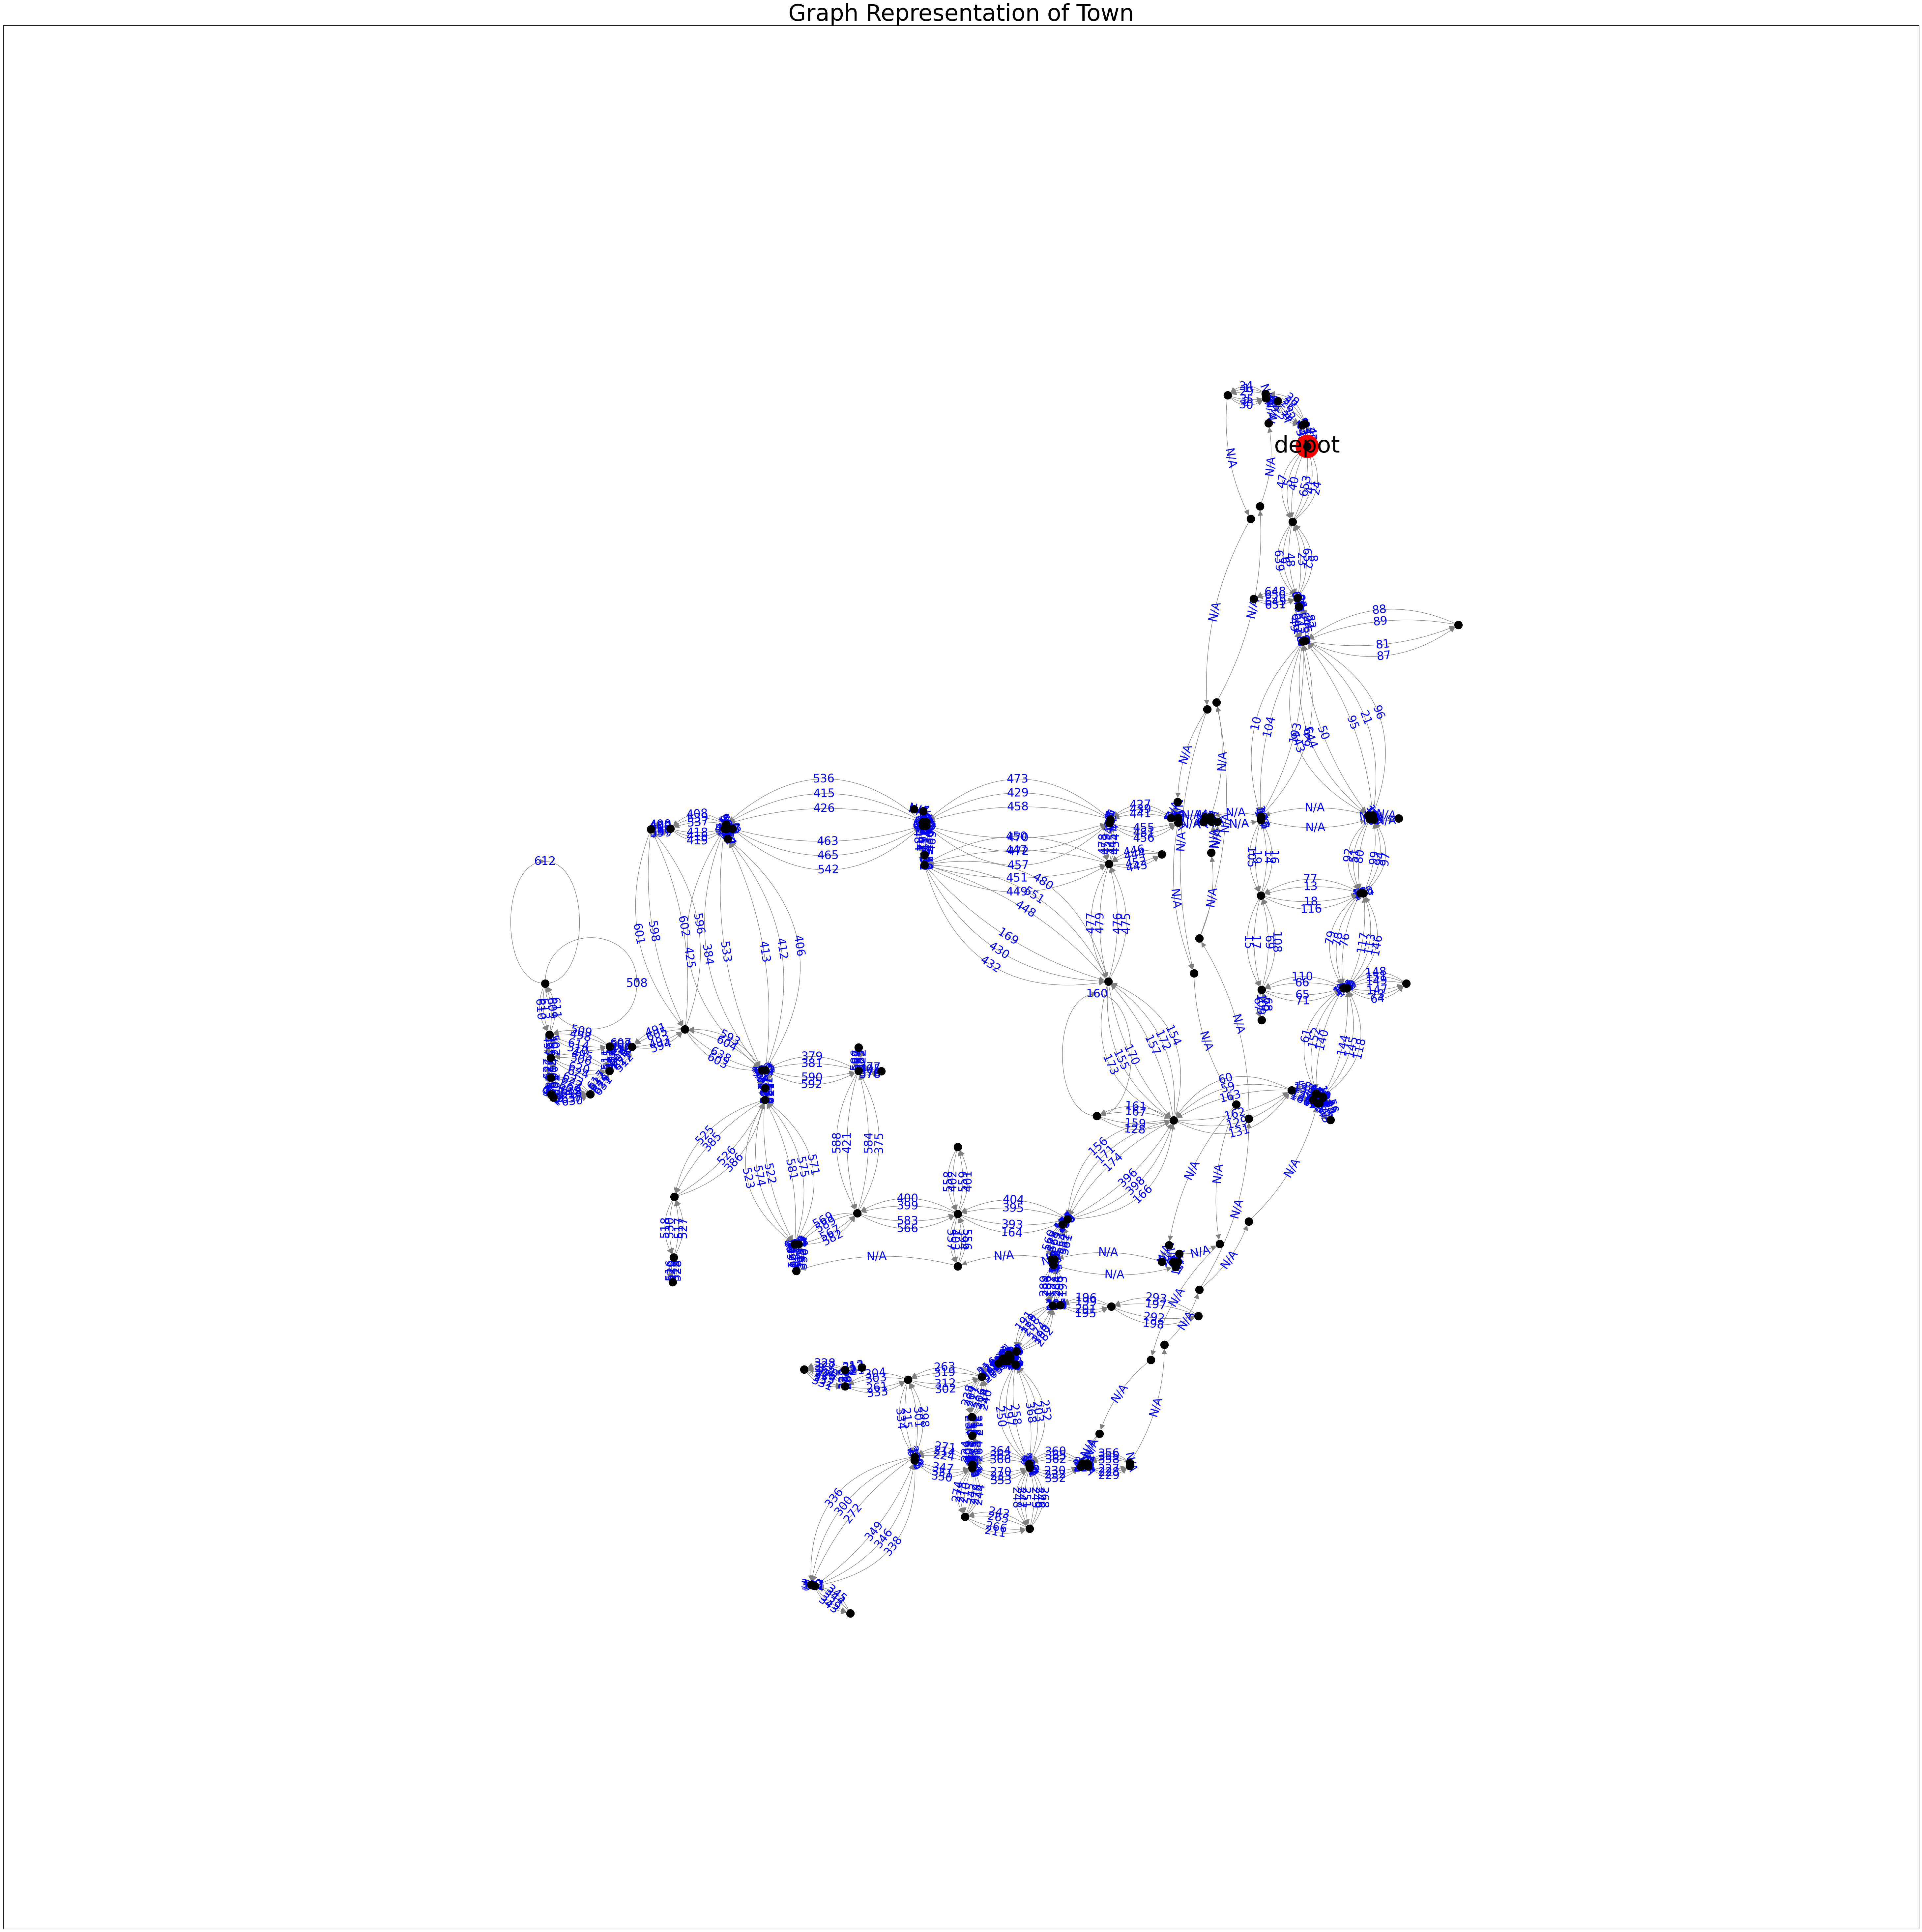

DONE


In [ ]:
# 5. Plot final routes
G_graph = plotting.add_order_attribute(G, sol.routes)
plotting.draw_labeled_multigraph(G_graph, 'order', size=(75,75), plotDepot=True)

print("DONE")

## Plot the routes using Folium

In [ ]:
new_m = folium.Map(location=[43.1, -89.5], zoom_start=12)
count = 0
for i, edge in enumerate(full_route):
    edge_data = G.get_edge_data(edge[0], edge[1], edge[2])
        
    if edge_data is not None:
            
        if i < len(full_route)-1:
            edge_data_next = G.get_edge_data(full_route[i+1][0], full_route[i+1][1], full_route[i+1][2])
            if edge_data_next is not None and "name" in edge_data_next and "name" in edge_data:
                if edge_data_next["name"] == edge_data["name"]:
                    continue
        lstring = edge_data['geometry']
        # swap long lat to lat long
        lstring = lstring.__class__([(y, x) for x, y in lstring.coords])
        midpoint = len(list(lstring.coords))//2
        icon_number = folium.plugins.BeautifyIcon(
            border_color="#00ABDC",
            border_width=1,
            text_color="#00ABDC",
            number=count,
            inner_icon_style="margin-top:2;",
        )
        folium.PolyLine(locations=lstring.coords, color='blue', weight=1, tooltip=edge_data).add_to(new_m)
        folium.Marker(location=lstring.coords[midpoint], popup=f"Edge {count}", icon=icon_number).add_to(new_m)
        count += 1
new_m